In [1]:
import keras
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
n_pts = 500
X,Y = datasets.make_circles(n_samples = n_pts,random_state = 123,noise = 0.1,factor = 0.2)

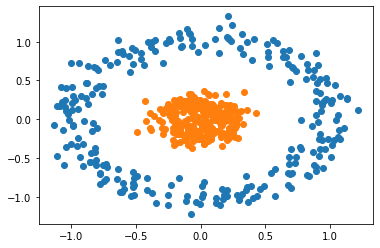

In [4]:
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])

In [5]:
model = Sequential()
model.add(Dense(4,input_shape=(2,),activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(Adam(learning_rate = 0.01),'binary_crossentropy',metrics = ['accuracy'])

In [6]:
h = model.fit(x = X,y = Y,verbose = 1, batch_size = 20, epochs = 100,shuffle = 'true')

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7120 - accuracy: 0.4620
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5640
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5560
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4020
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.6380
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.6800
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.3780
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.4980
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5320
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.6360
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9980
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9980
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9980
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9980
Epoch 87/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9980
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9980
Epoch 89/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9980
Epoch 90/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9980
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9980
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9980
Epoch 93/100


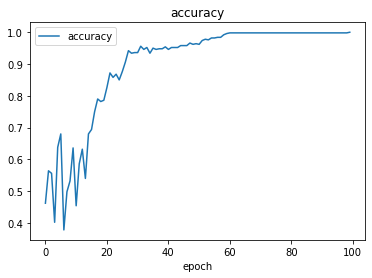

In [7]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

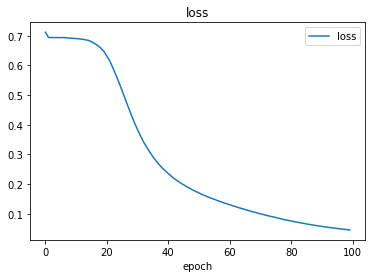

In [8]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [9]:
def plot_decision_boundary(X,Y,model):
    x_span = np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25,50)
    y_span = np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25,50)
    xx,yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

79/79 [==============================] - 0s 2ms/step


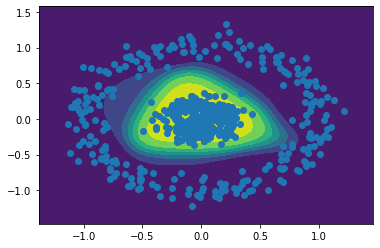

In [10]:
plot_decision_boundary(X,Y,model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])

1/1 [==============================] - 0s 39ms/step
Prediction is: [[0.9805957]]


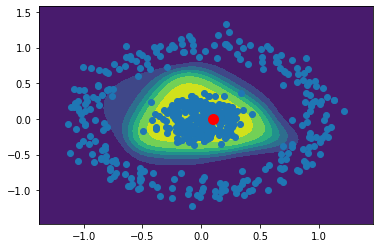

In [11]:
plot_decision_boundary(X,Y,model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])
x = 0.1
y = 0.0
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker = 'o',markersize = 10,color = 'red')
print(f"Prediction is: {prediction}")